## FLOOD PREDICTION: MACHINE LEARNING ALGORITHM DEVELOPMENT

### A) Data Acquisition

In [1]:
import pandas as pd
flood=pd.read_csv(r"C:\Users\sharu\OneDrive\Desktop\Downpour FD\Downpour EDA Dataset.csv")

In [2]:
flood.head()

,DISTRICT,DATE (DD/MM/YY),TIME (HH:MM),CAUSE,TEMPERATURE(°C),HUMIDITY (%),FLOOD OCCURRENCE
0,Kuala Selangor,31/12/2018,23:20,Continuous Rain,24.0,83.0,1
1,Kuala Selangor,6/8/2020,18:47,Poor Drainage System,31.0,69.0,0
2,Petaling Jaya,4/11/2018,21:35,Continuous Rain,24.0,84.0,1
3,Gombak,22/9/2018,22:35,Dam Breakage,31.0,67.0,0
4,Hulu Selangor,4/12/2021,10:45,Continuous Rain,23.0,86.0,1


In [3]:
flood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DISTRICT          199 non-null    object 
 1   DATE (DD/MM/YY)   196 non-null    object 
 2   TIME (HH:MM)      198 non-null    object 
 3   CAUSE             199 non-null    object 
 4   TEMPERATURE(°C)   192 non-null    float64
 5   HUMIDITY (%)      196 non-null    float64
 6   FLOOD OCCURRENCE  199 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 11.0+ KB


### B) Data Preparation

In [4]:
#missing data 
flood.isnull().sum()

DISTRICT            0
DATE (DD/MM/YY)     3
TIME (HH:MM)        1
CAUSE               0
TEMPERATURE(°C)     7
HUMIDITY (%)        3
FLOOD OCCURRENCE    0
dtype: int64

In [5]:
flood['HUMIDITY (%)'] = flood['HUMIDITY (%)'].fillna(flood['HUMIDITY (%)'].median())
flood['TEMPERATURE(°C)'] = flood['TEMPERATURE(°C)'].fillna(flood['TEMPERATURE(°C)'].median())

In [6]:
flood.dropna(inplace=True)

In [7]:
#duplicated rows 
data_duplication = flood.duplicated().sum()
if data_duplication:
    print('Number of Duplicated Rows : {}'.format(data_duplication))
else:
    print('Duplicate Rows not available')

Duplicate Rows not available


In [8]:
#data transformation
flood['DATE (DD/MM/YY)'] = pd.to_datetime(flood['DATE (DD/MM/YY)'], infer_datetime_format=True, errors='ignore')

In [9]:
flood['YEAR'] = flood['DATE (DD/MM/YY)'].dt.year
flood['MONTH'] = flood['DATE (DD/MM/YY)'].dt.month

In [10]:
flood.describe()

,TEMPERATURE(°C),HUMIDITY (%),FLOOD OCCURRENCE,YEAR,MONTH
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,27.600000,77.153846,0.538462,2019.492308,7.410256
std,3.045023,8.441242,0.499802,1.433650,3.745223
min,23.000000,65.000000,0.000000,2017.000000,1.000000
25%,25.000000,69.500000,0.000000,2018.000000,5.000000
50%,27.000000,79.000000,1.000000,2020.000000,8.000000
75%,30.000000,85.000000,1.000000,2021.000000,11.000000
max,33.000000,90.000000,1.000000,2022.000000,12.000000


In [11]:
#data reduction
flood.drop(['DATE (DD/MM/YY)', 'TIME (HH:MM)'], axis=1, inplace=True)
flood.dropna(inplace=True)

In [12]:
#feature encoding 
import numpy as np
flood_column_cat = flood.select_dtypes(exclude=[np.number]).columns
flood_column_cat

Index(['DISTRICT', 'CAUSE'], dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder
flood_label_encoder = LabelEncoder()
for i in flood_column_cat:
    flood[i] = flood_label_encoder.fit_transform(flood[i])
print("Flood Label Encoded Data: ")
flood.head()

Flood Label Encoded Data: 


,DISTRICT,CAUSE,TEMPERATURE(°C),HUMIDITY (%),FLOOD OCCURRENCE,YEAR,MONTH
0,5,0,24.0,83.0,1,2018,12
1,5,2,31.0,69.0,0,2020,8
2,6,0,24.0,84.0,1,2018,11
3,0,1,31.0,67.0,0,2018,9
4,2,0,23.0,86.0,1,2021,12


In [14]:
flood.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 198
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DISTRICT          195 non-null    int32  
 1   CAUSE             195 non-null    int32  
 2   TEMPERATURE(°C)   195 non-null    float64
 3   HUMIDITY (%)      195 non-null    float64
 4   FLOOD OCCURRENCE  195 non-null    int64  
 5   YEAR              195 non-null    int64  
 6   MONTH             195 non-null    int64  
dtypes: float64(2), int32(2), int64(3)
memory usage: 10.7 KB


In [15]:
#data normalization 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(flood)
print(scaled)

[[0.625      0.         0.1        ... 1.         0.2        1.        ]
 [0.625      0.5        0.8        ... 0.         0.6        0.63636364]
 [0.75       0.         0.1        ... 1.         0.2        0.90909091]
 ...
 [0.625      0.5        0.8        ... 0.         1.         0.54545455]
 [0.25       0.         0.5        ... 0.         0.8        0.45454545]
 [0.625      0.         0.         ... 1.         0.8        0.72727273]]


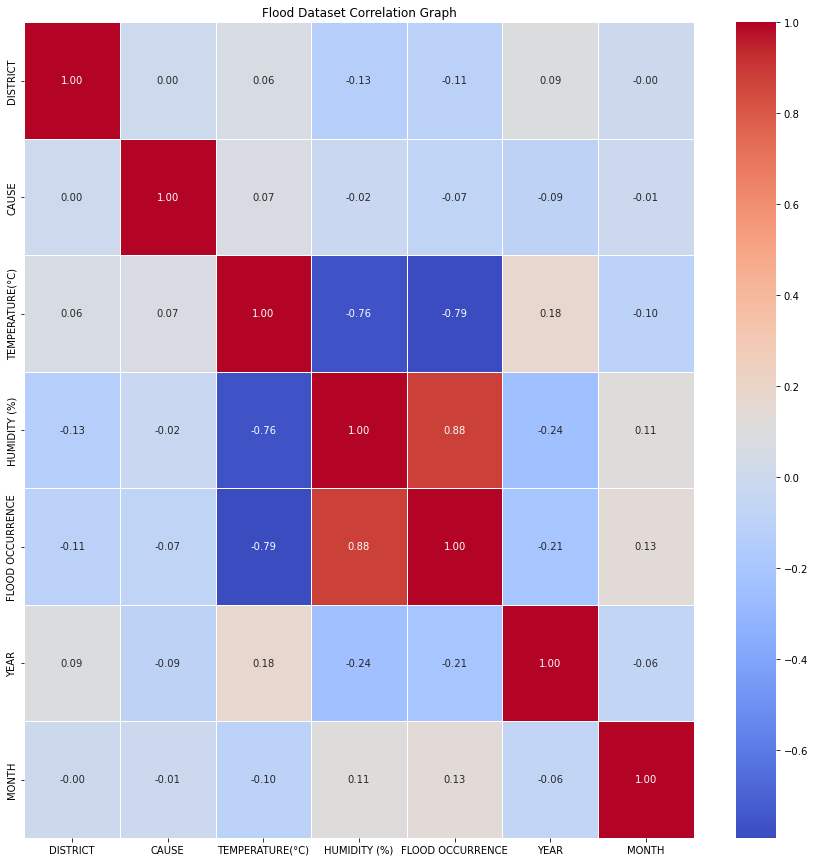

In [16]:
#correlation matrix 
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = flood.corr()
plt.figure(figsize=(15, 15))
plt.title("Flood Dataset Correlation Graph")
cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=.8, cmap='coolwarm');

In [17]:
flood.corr()['FLOOD OCCURRENCE'].sort_values(ascending = False)

FLOOD OCCURRENCE    1.000000
HUMIDITY (%)        0.879496
MONTH               0.134721
CAUSE              -0.073964
DISTRICT           -0.106279
YEAR               -0.206406
TEMPERATURE(°C)    -0.792548
Name: FLOOD OCCURRENCE, dtype: float64

In [18]:
flood.drop(['YEAR', 'CAUSE'], axis=1, inplace=True)
flood.dropna(inplace=True)

### C) Model Development

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(flood.drop('FLOOD OCCURRENCE',axis=1),
flood['FLOOD OCCURRENCE'], test_size=0.30,random_state=101)

In [20]:
from sklearn.linear_model import LogisticRegression
log_reg  = LogisticRegression(solver='liblinear')
log_reg .fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [21]:
predictLR = log_reg.predict(X_test)

### D) Model Evaluation

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusionMatrix = confusion_matrix(y_test, predictLR)
confusionMatrix

array([[25,  0],
       [ 2, 32]], dtype=int64)

LOGISTIC REGRESSION EVALUATION

Accuracy Score: 96.61%



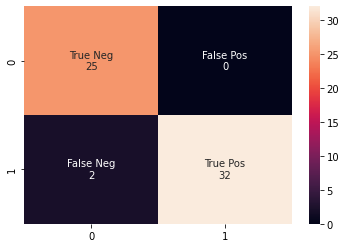

Report: 

                   0          1  accuracy  macro avg  weighted avg
precision   0.925926   1.000000  0.966102   0.962963      0.968613
recall      1.000000   0.941176  0.966102   0.970588      0.966102
f1-score    0.961538   0.969697  0.966102   0.965618      0.966240
support    25.000000  34.000000  0.966102  59.000000     59.000000


In [23]:
print("LOGISTIC REGRESSION EVALUATION\n")
print(f"Accuracy Score: {accuracy_score(y_test, predictLR) * 100:.2f}%\n")
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in confusionMatrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, predictLR), annot=labels, fmt ='')
plt.show()
print("Report: \n")
print(pd.DataFrame(classification_report(y_test, predictLR, output_dict=True)))

### E) Model Validation

In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg , X_train, y_train, cv = 10,scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[1.         1.         1.         0.92857143 1.         1.
 0.84615385 0.92307692 1.         1.        ]


In [25]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()*100))

Average cross-validation score: 96.9780


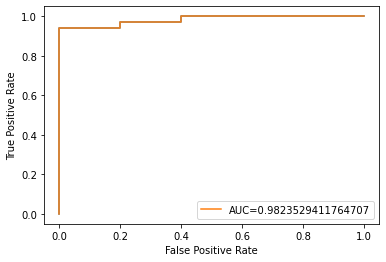

In [26]:
from sklearn import metrics
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

### F) Model Expoting to .joblib

In [27]:
import joblib


joblib.dump(log_reg, 'model.joblib')

['model.joblib']

### G) .joblib Model Convertion to Tensorflow Model

In [28]:
log_reg = joblib.load('model.joblib')

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
tf_model = Sequential()
tf_model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))

In [30]:
tf_model.set_weights([log_reg.coef_.T, log_reg.intercept_])

In [31]:
tf_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### H) Tensorflow Model Evaluation

In [32]:
y_pred = tf_model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [33]:
score = tf_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.1337 - accuracy: 0.9661


In [34]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13365967571735382
Test accuracy: 0.9661017060279846


### I) Tensorflow Model Exporting to .h5

In [35]:
tf_model.save('my_model.h5')

### J) .h5 Model Convertion to Tensorflow Lite Model

In [36]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(tf_model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\sharu\AppData\Local\Temp\tmpjac07dnb\assets


INFO:tensorflow:Assets written to: C:\Users\sharu\AppData\Local\Temp\tmpjac07dnb\assets


### k) Tensorflow Lite Model Exporting to .tflite

In [37]:
with open('my_model.tflite', 'wb') as f:
    f.write(tflite_model)